<a href="https://colab.research.google.com/github/dn3ndra/DeepLearning/blob/main/03.%20Week%203/Assignment/CIFAR_10_Datasets_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define MLP model (Vanilla)
def create_mlp_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# Define CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Train MLP model
mlp_model = create_mlp_model()
mlp_model.summary()
mlp_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,812,618 (14.54 MB)

 Trainable params: 3,809,034 (14.53 MB)

 Non-trainable params: 3,584 (14.00 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2348 - loss: 2.4874 - val_accuracy: 0.3295 - val_loss: 1.8460
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3477 - loss: 1.8128 - val_accuracy: 0.3910 - val_loss: 1.6885
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3639 - loss: 1.7567 - val_accuracy: 0.3730 - val_loss: 1.6989
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3710 - loss: 1.7457 - val_accuracy: 0.4085 - val_loss: 1.6293
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3779 - loss: 1.7318 - val_accuracy: 0.3890 - val_loss: 1.6625
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3847 - loss: 1.7157 - val_accuracy: 0.3977 - val_loss: 1.6667
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3923 - loss: 1.7024 - val_accuracy: 0.4182 - val_loss: 1.6232
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3878 - loss: 1.7015 - val_accuracy:

In [7]:
# Train CNN model
cnn_model = create_cnn_model()
cnn_model.summary()
cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=64)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,344,170 (5.13 MB)

 Trainable params: 1,342,698 (5.12 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.3725 - loss: 1.9123 - val_accuracy: 0.6146 - val_loss: 1.0775
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6256 - loss: 1.0646 - val_accuracy: 0.6706 - val_loss: 0.9720
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6973 - loss: 0.8644 - val_accuracy: 0.6968 - val_loss: 0.8675
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7367 - loss: 0.7493 - val_accuracy: 0.7309 - val_loss: 0.7632
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7572 - loss: 0.6895 - val_accuracy: 0.7245 - val_loss: 0.8255
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7846 - loss: 0.6244 - val_accuracy: 0.7788 - val_loss: 0.6516
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7982 - loss: 0.5807 - val_accuracy: 0.7845 - val_loss: 0.6399
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8179 - loss: 0.5299 - val_accura

In [8]:
# Evaluation function
def evaluate_model(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    return test_acc


In [9]:
# Evaluate MLP model
mlp_acc = evaluate_model(mlp_model, test_images, test_labels)

313/313 - 1s - 5ms/step - accuracy: 0.3959 - loss: 1.6786
Test Accuracy: 39.59%


In [10]:
# Evaluate CNN model
cnn_acc = evaluate_model(cnn_model, test_images, test_labels)

313/313 - 2s - 5ms/step - accuracy: 0.7981 - loss: 0.6231
Test Accuracy: 79.81%


In [11]:
# Get predictions for ROC and AUC
mlp_preds = mlp_model.predict(test_images)
cnn_preds = cnn_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [12]:
# Binarize the labels for AUC and ROC
mlp_true = label_binarize(test_labels, classes=np.arange(10))
cnn_true = label_binarize(test_labels, classes=np.arange(10))


In [13]:
# Calculate precision, recall, F1 score, AUC, and ROC
def calculate_metrics(true_labels, predictions):
    # Convert predictions to class indices
    pred_classes = np.argmax(predictions, axis=1)  # Class indices with the highest probability

    # Precision
    precision = precision_score(true_labels, pred_classes, average='macro', zero_division=0)

    # Recall
    recall = recall_score(true_labels, pred_classes, average='macro', zero_division=0)

    # F1 score
    f1 = f1_score(true_labels, pred_classes, average='macro', zero_division=0)
    f1_squared = f1 ** 2

    # AUC - One-vs-Rest (OvR)
    auc = roc_auc_score(label_binarize(true_labels, classes=np.arange(10)), predictions, multi_class='ovr')

    # ROC Curve
    fpr, tpr, _ = roc_curve(label_binarize(true_labels, classes=np.arange(10)).ravel(), predictions.ravel())

    # Plot ROC curve
    plt.figure(figsize=(5, 3))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("Receiver Operating Characteristic")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

    return precision, recall, f1, f1_squared, auc

In [14]:
# Ensure true labels and predictions are in the right shape
mlp_true = test_labels.flatten()  # Flatten to 1D array (10000,)
mlp_pred_classes = np.argmax(mlp_preds, axis=1)  # Get predicted class indices (10000,)

cnn_true = test_labels.flatten()  # Flatten to 1D array (10000,)
cnn_pred_classes = np.argmax(cnn_preds, axis=1)  # Get predicted class indices (10000,)


MLP Evaluation Metrics:


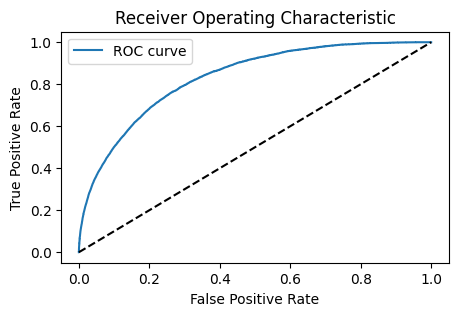

In [15]:
# MLP Metrics
print("\nMLP Evaluation Metrics:")
mlp_precision, mlp_recall, mlp_f1, mlp_f1_squared, mlp_auc = calculate_metrics(mlp_true, mlp_preds)



CNN Evaluation Metrics:


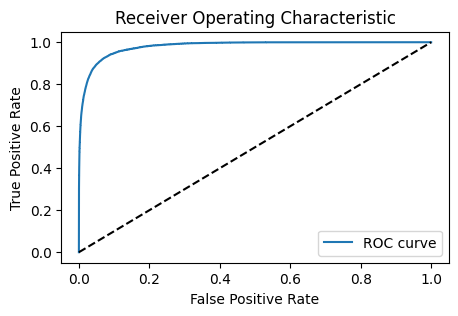

In [16]:
# CNN Metrics
print("\nCNN Evaluation Metrics:")
cnn_precision, cnn_recall, cnn_f1, cnn_f1_squared, cnn_auc = calculate_metrics(cnn_true, cnn_preds)


In [17]:
# MLP
print(f"\nMLP Test Precision (Macro Avg): {mlp_precision:.4f}")
print(f"MLP Test Recall (Macro Avg): {mlp_recall:.4f}")
print(f"MLP Test F1 Score (Macro Avg): {mlp_f1:.4f}")
print(f"MLP Test F1 Squared: {mlp_f1_squared:.4f}")
print(f"MLP Test AUC: {mlp_auc:.4f}")
print(f"MLP Test Accuracy: {mlp_acc * 100:.2f}%")  # Add Testing Accuracy for MLP


MLP Test Precision (Macro Avg): 0.4491
MLP Test Recall (Macro Avg): 0.3959
MLP Test F1 Score (Macro Avg): 0.3699
MLP Test F1 Squared: 0.1368
MLP Test AUC: 0.8461
MLP Test Accuracy: 39.59%


In [18]:
#CNN
print(f"\nCNN Test Precision (Macro Avg): {cnn_precision:.4f}")
print(f"CNN Test Recall (Macro Avg): {cnn_recall:.4f}")
print(f"CNN Test F1 Score (Macro Avg): {cnn_f1:.4f}")
print(f"CNN Test F1 Squared: {cnn_f1_squared:.4f}")
print(f"CNN Test AUC: {cnn_auc:.4f}")
print(f"CNN Test Accuracy: {cnn_acc * 100:.2f}%")  # Add Testing Accuracy for CNN


CNN Test Precision (Macro Avg): 0.8149
CNN Test Recall (Macro Avg): 0.7981
CNN Test F1 Score (Macro Avg): 0.7932
CNN Test F1 Squared: 0.6292
CNN Test AUC: 0.9816
CNN Test Accuracy: 79.81%


In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Visualize AUC-ROC Curve for All Classes
def plot_roc_curve_all_classes(true_labels, predictions, model_name="Model"):
    # Binarize the true labels
    true_labels_bin = label_binarize(true_labels, classes=np.arange(10))

    # Get False Positive Rate (FPR) and True Positive Rate (TPR) for each class
    fpr, tpr, roc_auc = {}, {}, {}

    plt.figure(figsize=(8, 5))

    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

    # Plotting the diagonal line (chance level)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")
    plt.title(f'{model_name} - AUC-ROC Curve for All Classes')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return roc_auc


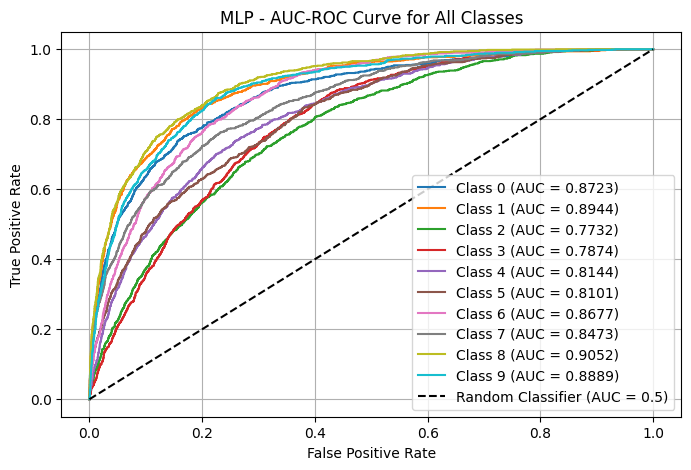

{0: np.float64(0.8723498888888889),
 1: np.float64(0.8944169999999999),
 2: np.float64(0.7732406666666667),
 3: np.float64(0.787369111111111),
 4: np.float64(0.8143775555555557),
 5: np.float64(0.8101204444444445),
 6: np.float64(0.8677124444444444),
 7: np.float64(0.8472904444444446),
 8: np.float64(0.9052171111111111),
 9: np.float64(0.888866)}

In [20]:
# Visualize MLP ROC Curve for All Classes
plot_roc_curve_all_classes(mlp_true, mlp_preds, model_name="MLP")



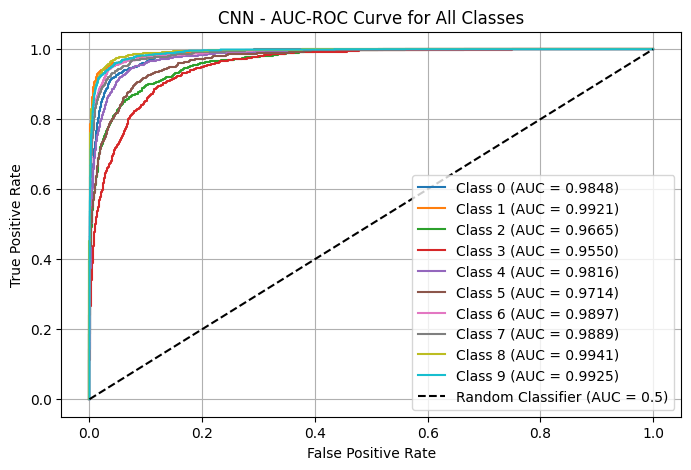

{0: np.float64(0.9847508888888888),
 1: np.float64(0.9920795555555557),
 2: np.float64(0.9664666666666666),
 3: np.float64(0.9549776666666666),
 4: np.float64(0.9815843333333333),
 5: np.float64(0.971425),
 6: np.float64(0.9897455000000001),
 7: np.float64(0.9889153333333333),
 8: np.float64(0.994086111111111),
 9: np.float64(0.992459611111111)}

In [21]:
# Visualize CNN ROC Curve for All Classes
plot_roc_curve_all_classes(cnn_true, cnn_preds, model_name="CNN")

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot Confusion Matrix
def plot_confusion_matrix(true_labels, predictions, model_name="Model"):
    cm = confusion_matrix(true_labels, predictions)  # Calculate confusion matrix
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

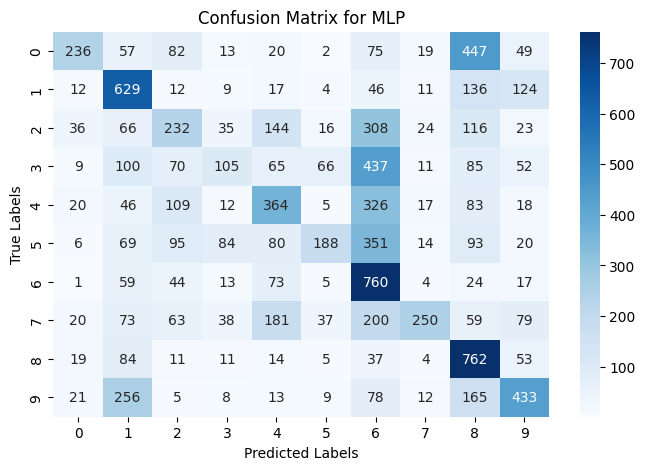

In [23]:
# Visualize Confusion Matrix for MLP
mlp_pred_classes = np.argmax(mlp_preds, axis=1)
plot_confusion_matrix(mlp_true, mlp_pred_classes, model_name="MLP")


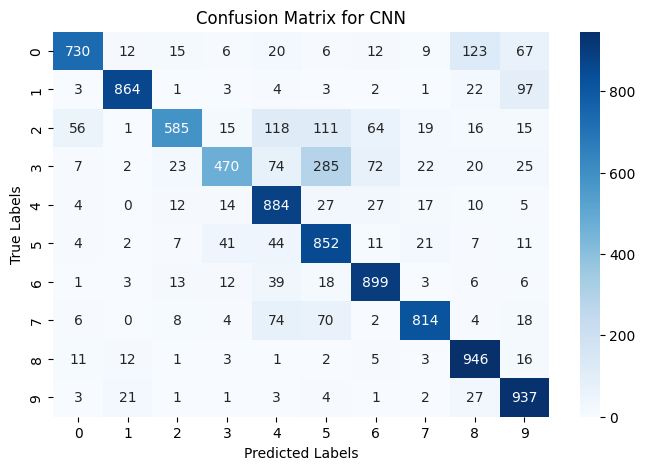

In [24]:
# Visualize Confusion Matrix for CNN
cnn_pred_classes = np.argmax(cnn_preds, axis=1)
plot_confusion_matrix(cnn_true, cnn_pred_classes, model_name="CNN")


# Kesimpulan

Berdasarkan hasil evaluasi model **CNN** dan **MLP** pada dataset **CIFAR-10**, berikut adalah beberapa kesimpulan yang dapat diambil:

## 1. **Akurasi dan Kinerja**
- **CNN** menunjukkan performa yang sangat baik dengan **Akurasi 79.81%**, **Precision 0.8149**, dan **Recall 0.7981**. Model ini dapat mengklasifikasikan data dengan baik, menunjukkan bahwa CNN efektif dalam menangani tugas klasifikasi pada dataset CIFAR-10.
- **MLP**, di sisi lain, memiliki performa yang jauh lebih rendah dengan **Akurasi 39.59%**, **Precision 0.4491**, dan **Recall 0.3959**. Hasil ini menunjukkan bahwa MLP tidak cukup kuat dalam mengenali pola dalam data CIFAR-10, yang lebih kompleks dibandingkan dengan dataset yang lebih sederhana.

## 2. **F1 Score**
- **CNN** memiliki **F1 Score 0.7932**, yang mencerminkan keseimbangan yang baik antara **Precision** dan **Recall**. Ini menunjukkan bahwa CNN mampu mencapai kompromi yang efektif dalam mengklasifikasikan gambar dengan akurat tanpa terlalu banyak menghasilkan kesalahan.
- **MLP** memiliki **F1 Score 0.3699**, yang sangat rendah dan mengindikasikan bahwa model ini mengalami kesulitan dalam menangani data CIFAR-10 dengan baik, dengan banyak kesalahan baik pada prediksi positif maupun negatif.

## 3. **AUC (Area Under Curve)**
- **CNN** memiliki **AUC 0.9810**, yang sangat tinggi, menunjukkan bahwa model ini memiliki kemampuan yang sangat baik dalam membedakan antara kelas yang berbeda. AUC yang tinggi juga menunjukkan bahwa model ini dapat menangani dataset dengan baik meskipun menggunakan berbagai threshold.
- **MLP** memiliki **AUC 0.8461**, yang masih cukup baik, tetapi jauh lebih rendah dibandingkan dengan CNN, menunjukkan bahwa MLP tidak mampu mengklasifikasikan kelas dengan tingkat kepercayaan yang sama seperti CNN.

## 4. **F1 Squared**
- **CNN** memiliki **F1 Squared 0.6292**, yang menunjukkan bahwa model ini memiliki kinerja yang lebih konsisten antara precision dan recall.
- **MLP** memiliki **F1 Squared 0.1368**, yang jauh lebih rendah, menunjukkan ketidakseimbangan yang signifikan dalam kinerja antara precision dan recall.

## Rekomendasi
- **CNN** adalah model yang jauh lebih unggul dalam menangani tugas klasifikasi gambar pada dataset **CIFAR-10** dibandingkan dengan **MLP**.
- **MLP** mungkin memerlukan arsitektur yang lebih kompleks atau penggunaan teknik lain (seperti regularisasi atau data augmentation) untuk meningkatkan kinerjanya.


# Penjelasan Persamaan Matematika untuk Evaluasi Model

### 1. **Cross Entropy Loss**:
Cross-Entropy Loss digunakan untuk mengukur perbedaan antara distribusi probabilitas yang diprediksi oleh model dan distribusi yang sebenarnya (ground truth). Formula untuk **Cross Entropy Loss** adalah sebagai berikut:

$$
L = -\sum_{i=1}^{N} y_i \cdot \log(p_i)
$$

- \(L\) adalah nilai **Loss**.
- \(N\) adalah jumlah kelas.
- \(y_i\) adalah label ground truth (biasanya berupa vektor one-hot).
- \(p_i\) adalah probabilitas yang diprediksi oleh model untuk kelas ke-\(i\).
- \(\log(p_i)\) adalah logaritma dari probabilitas yang diprediksi untuk kelas yang benar.

### 2. **Akurasi (Accuracy)**:
Akurasi mengukur seberapa banyak prediksi model yang benar dibandingkan dengan jumlah total prediksi. Formula untuk **Akurasi** adalah:

$$
\text{Akurasi} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

- **TP** (True Positive): Jumlah prediksi positif yang benar.
- **TN** (True Negative): Jumlah prediksi negatif yang benar.
- **FP** (False Positive): Jumlah prediksi negatif yang salah.
- **FN** (False Negative): Jumlah prediksi positif yang salah.

Akurasi mengukur persentase prediksi yang benar dari total prediksi yang dilakukan oleh model.

### 3. **Precision**:
Precision adalah metrik yang mengukur akurasi prediksi positif model, yaitu seberapa banyak prediksi positif yang benar. Formula untuk **Precision** adalah:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **TP** (True Positive): Jumlah prediksi positif yang benar.
- **FP** (False Positive): Jumlah prediksi negatif yang salah.

Precision mengukur proporsi prediksi positif yang benar.

### 4. **Recall**:
Recall adalah metrik yang mengukur seberapa banyak data positif yang berhasil diprediksi oleh model. Formula untuk **Recall** adalah:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **TP** (True Positive): Jumlah prediksi positif yang benar.
- **FN** (False Negative): Jumlah prediksi positif yang salah.

Recall mengukur proporsi data positif yang berhasil ditangkap oleh model.

### 5. **F1 Score**:
F1 Score adalah rata-rata harmonis antara **Precision** dan **Recall**. Ini memberikan gambaran keseimbangan antara keduanya. Formula untuk **F1 Score** adalah:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

F1 Score membantu mengatasi trade-off antara Precision dan Recall, memberikan skor yang seimbang.

### 6. **AUC-ROC (Area Under Curve - Receiver Operating Characteristic)**:
AUC adalah area di bawah kurva **ROC** (Receiver Operating Characteristic). ROC menggambarkan hubungan antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)** pada berbagai ambang batas (thresholds). Formula untuk **AUC-ROC** adalah:

$$
\text{AUC} = \int_0^1 \text{TPR}(fpr) \, dfpr
$$

- **TPR** (True Positive Rate) adalah sensitivitas atau recall: $$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$
- **FPR** (False Positive Rate) adalah: $$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}} $$
AUC-ROC mengukur kemampuan model untuk membedakan kelas-kelas yang berbeda, dengan nilai AUC yang lebih tinggi menunjukkan performa yang lebih baik.

### 7. **ROC Curve**:
ROC curve adalah grafik yang menunjukkan **True Positive Rate (TPR)** vs **False Positive Rate (FPR)** pada berbagai nilai ambang batas (thresholds). Formula ROC adalah sebagai berikut:

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

ROC curve digunakan untuk memvisualisasikan kemampuan model dalam mengklasifikasikan data dengan benar pada berbagai threshold.
